## Context

This notebook focuses on a crucial task in bioinformatics and medical diagnostics: classifying different types of leukemia based on gene expression profiles. Acute Myeloid Leukemia (AML) and Acute Lymphoblastic Leukemia (ALL) are two major categories of leukemia, a cancer of the blood or bone marrow. Accurate differentiation between AML and ALL is vital because their prognoses and treatment strategies differ significantly. Gene expression analysis, which measures the activity of thousands of genes simultaneously, has emerged as a powerful tool for understanding the molecular basis of diseases like leukemia and for developing diagnostic and prognostic biomarkers.

The dataset used in this analysis is a publicly available benchmark dataset from Kaggle, originally used in a prominent study on gene expression-based cancer classification. It provides a valuable opportunity to apply and compare various machine learning techniques to a high-dimensional biological dataset with the goal of building models that can reliably distinguish between AML and ALL.

## Data Description

The dataset consists of two CSV files: `data_set_ALL_AML_train.csv` for training and `data_set_ALL_AML_independent.csv` for independent testing. Both datasets share a similar structure, with rows representing genes and columns representing individual patient samples.

Here's a description of the key columns:

*   **`Gene Description`**: This column provides a textual description of the gene. It often includes the official gene symbol and a brief note about its function or associated protein. This column is useful for understanding the biological relevance of the genes but is typically not used directly in the machine learning model training as it's non-numerical text.
*   **`Gene Accession Number`**: This column contains a unique identifier for each gene, often an accession number from a public gene database (like GenBank). This column serves as a stable identifier for the genes and is also generally not used as a feature in the machine learning models. It is useful for tracking and referencing specific genes.
*   **Sample Columns (e.g., `1`, `2`, `3`, ..., `39`, `40`, `42`, etc.)**: These columns represent the individual patient samples. The column headers are typically numerical identifiers for the samples. The values within these columns are the **gene expression levels** for the corresponding gene in that specific patient sample. These numerical values are the primary features used to train the classification models. Higher values generally indicate higher activity or expression of that gene in the sample.
*   **`call` Columns (e.g., `call`, `call.1`, `call.2`, etc.)**: These columns are associated with the adjacent sample columns. They often contain categorical values (like 'A' for Absent, 'P' for Present, 'M' for Marginal) indicating the reliability or quality of the gene expression measurement for that gene in that specific sample. While potentially useful for filtering or quality control, these 'call' columns were excluded from the machine learning model training in this analysis, focusing solely on the numerical expression levels.

In essence, each row (excluding the first two descriptive columns) represents the expression profile of a single gene across all the patient samples in that dataset. Conversely, when we transpose the data for model training, each row represents a patient sample, and the columns represent the expression levels of different genes in that sample.

SOURCE : KAGGLE


# AML and ALL Gene Expression Classification Analysis

This notebook performs a comprehensive classification analysis on gene expression data from patients with Acute Myeloid Leukemia (AML) and Acute Lymphoblastic Leukemia (ALL) using the provided training and independent datasets. The goal is to build and compare multiple machine learning models to differentiate between these two types of leukemia based on gene expression levels.

The analysis follows a standard data science workflow:
1.  **Data Loading**: Loading the datasets.
2.  **Exploratory Data Analysis (EDA)**: Examining data structure, distributions, and initial insights.
3.  **Data Preparation and Preprocessing**: Separating features and target variables, handling potential issues, and encoding labels.
4.  **Feature Selection**: Identifying the most relevant genes for classification.
5.  **Model Training and Evaluation**: Training multiple classification models and evaluating their performance on the independent dataset.
6.  **Model Comparison and Overfitting Assessment**: Comparing the performance of different models and checking for signs of overfitting.
7.  **Summarize Findings**: Presenting a summary of the entire analysis, key findings, and conclusions.

## 1. Data Loading

Load the training and independent datasets into pandas DataFrames.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
df_train = pd.read_csv('/content/data_set_ALL_AML_train.csv')
df_independent = pd.read_csv('/content/data_set_ALL_AML_independent.csv')

print("Training Dataset Loaded:")
print(df_train.head())
print("\nIndependent Dataset Loaded:")
print(df_independent.head())

Training Dataset Loaded:
                      Gene Description Gene Accession Number    1 call    2  \
0  AFFX-BioB-5_at (endogenous control)        AFFX-BioB-5_at -214    A -139   
1  AFFX-BioB-M_at (endogenous control)        AFFX-BioB-M_at -153    A  -73   
2  AFFX-BioB-3_at (endogenous control)        AFFX-BioB-3_at  -58    A   -1   
3  AFFX-BioC-5_at (endogenous control)        AFFX-BioC-5_at   88    A  283   
4  AFFX-BioC-3_at (endogenous control)        AFFX-BioC-3_at -295    A -264   

  call.1    3 call.2    4 call.3  ...   29 call.33   30 call.34   31 call.35  \
0      A  -76      A -135      A  ...   15       A -318       A  -32       A   
1      A  -49      A -114      A  ... -114       A -192       A  -49       A   
2      A -307      A  265      A  ...    2       A  -95       A   49       A   
3      A  309      A   12      A  ...  193       A  312       A  230       P   
4      A -376      A -419      A  ...  -51       A -139       A -367       A   

    32 call.36   33

### What has been done here and next step

Load the training and independent datasets into pandas DataFrames.

**Findings:**
- Successfully loaded the training and independent datasets into pandas DataFrames.
- The datasets have the same number of rows (genes) but different numbers of columns (samples + descriptive columns).
- The training data contains 38 samples and the independent data contains 34 samples.
- There are no missing values in either dataset.

**Next Steps:**
- Proceed to Exploratory Data Analysis (EDA) to understand the data distribution and characteristics.
- Prepare and preprocess the data for machine learning models, including separating features and labels and handling the 'call' columns.

## 2. Exploratory Data Analysis (EDA)

Examine the structure, content, and basic statistics of the datasets.

Shape of Training DataFrame: (7129, 78)
Shape of Independent DataFrame: (7129, 70)

Training DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129 entries, 0 to 7128
Data columns (total 78 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gene Description       7129 non-null   object
 1   Gene Accession Number  7129 non-null   object
 2   1                      7129 non-null   int64 
 3   call                   7129 non-null   object
 4   2                      7129 non-null   int64 
 5   call.1                 7129 non-null   object
 6   3                      7129 non-null   int64 
 7   call.2                 7129 non-null   object
 8   4                      7129 non-null   int64 
 9   call.3                 7129 non-null   object
 10  5                      7129 non-null   int64 
 11  call.4                 7129 non-null   object
 12  6                      7129 non-null   int64 
 13  call.5        

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,28,29,30,31,32,33
count,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,...,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000
mean,641.367092,690.246318,698.307897,600.985271,679.532894,564.797728,584.437649,571.359097,789.713705,599.483097,...,514.496704,775.143498,689.248141,626.885959,673.279422,556.463179,718.934493,598.648899,676.920887,723.563473
std,2264.294361,2468.814372,2485.656277,2340.047428,2375.895416,2494.604090,2412.812263,2378.780450,2580.157021,2421.156219,...,2440.722824,2676.664777,2543.537830,2473.180838,2413.149603,2376.681824,2533.678058,2405.268550,2436.964933,2507.382019
min,-19826.000000,-17930.000000,-27182.000000,-23396.000000,-10339.000000,-21658.000000,-24024.000000,-27570.000000,-25171.000000,-12500.000000,...,-16281.000000,-27398.000000,-23673.000000,-23645.000000,-20376.000000,-9501.000000,-17580.000000,-25491.000000,-28400.000000,-27811.000000
25%,-21.000000,-14.000000,-31.000000,-33.000000,8.000000,-26.000000,-33.000000,-58.000000,-14.000000,-15.000000,...,-43.000000,-27.000000,-23.000000,-22.000000,-16.000000,-13.000000,-25.000000,-32.000000,-22.000000,-38.000000
50%,159.000000,130.000000,177.000000,139.000000,146.000000,106.000000,134.000000,140.000000,166.000000,103.000000,...,108.000000,144.000000,134.000000,133.000000,150.000000,82.000000,128.000000,107.000000,155.000000,170.000000
75%,535.000000,488.000000,610.000000,497.000000,471.000000,401.000000,497.000000,527.000000,609.000000,386.000000,...,396.000000,569.000000,505.000000,490.000000,517.000000,309.000000,488.000000,443.000000,549.000000,649.000000
max,31086.000000,29288.000000,28056.000000,31449.000000,29543.000000,38467.000000,41911.000000,40065.000000,23602.000000,28033.000000,...,61228.000000,37164.000000,32204.000000,29169.000000,29833.000000,30354.000000,25055.000000,28350.000000,25093.000000,32946.000000



Descriptive statistics of Independent DataFrame:


,39,40,42,47,48,49,41,43,44,45,...,54,57,58,60,61,65,66,63,64,62
count,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,...,7129.00000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.00000
mean,582.194978,527.819329,603.813719,576.027213,751.464862,601.516763,565.152476,563.614252,531.401599,530.194137,...,668.70122,497.195820,561.964371,561.004629,581.006593,556.054145,530.495020,727.593351,686.850610,671.16496
std,2473.986881,2304.800191,2377.775459,2436.848381,2437.815002,2432.454360,2352.036107,2521.409254,2335.848476,2368.906095,...,2505.06701,2436.468032,2688.424072,2615.321812,2467.740997,2360.238246,2463.108827,2488.340963,2703.734409,2659.95898
min,-21984.000000,-21296.000000,-10481.000000,-7861.000000,-16945.000000,-26775.000000,-7764.000000,-13905.000000,-9619.000000,-5353.000000,...,-11978.00000,-11067.000000,-16131.000000,-9338.000000,-16268.000000,-14244.000000,-7626.000000,-20782.000000,-26258.000000,-11973.00000
25%,-33.000000,-36.000000,-17.000000,-8.000000,-6.000000,-65.000000,-7.000000,-21.000000,-45.000000,-59.000000,...,-10.00000,-27.000000,-49.000000,-19.000000,-36.000000,-31.000000,-15.000000,-21.000000,-51.000000,-20.00000
50%,125.000000,124.000000,116.000000,126.000000,158.000000,139.000000,93.000000,110.000000,74.000000,78.000000,...,151.00000,82.000000,129.000000,98.000000,117.000000,99.000000,73.000000,162.000000,195.000000,136.00000
75%,439.000000,424.000000,420.000000,374.000000,577.000000,552.000000,342.000000,372.000000,321.000000,327.000000,...,469.00000,296.000000,435.000000,321.000000,422.000000,366.000000,280.000000,578.000000,683.000000,474.00000
max,45815.000000,29136.000000,37529.000000,43221.000000,25231.000000,29500.000000,31076.000000,49432.000000,35402.000000,34741.000000,...,35742.00000,38690.000000,59647.000000,40792.000000,37374.000000,27447.000000,53204.000000,31585.000000,71369.000000,48374.00000



Missing values in Training DataFrame: 0
Missing values in Independent DataFrame: 0

Distribution of ALL and AML samples in Training Data:


,count
Leukemia_Type,
ALL,27
AML,11


<ipython-input-2-4f5120c9c823>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Leukemia_Type', y=gene, data=df_numerical_train, ax=axes[i], palette=['skyblue', 'lightcoral'])
<ipython-input-2-4f5120c9c823>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Leukemia_Type', y=gene, data=df_numerical_train, ax=axes[i], palette=['skyblue', 'lightcoral'])
<ipython-input-2-4f5120c9c823>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Leukemia_Type', y=gene, data=df_numerical_train, ax=axes[i], palette=['skyblue', 'lightcoral'])
<ipytho

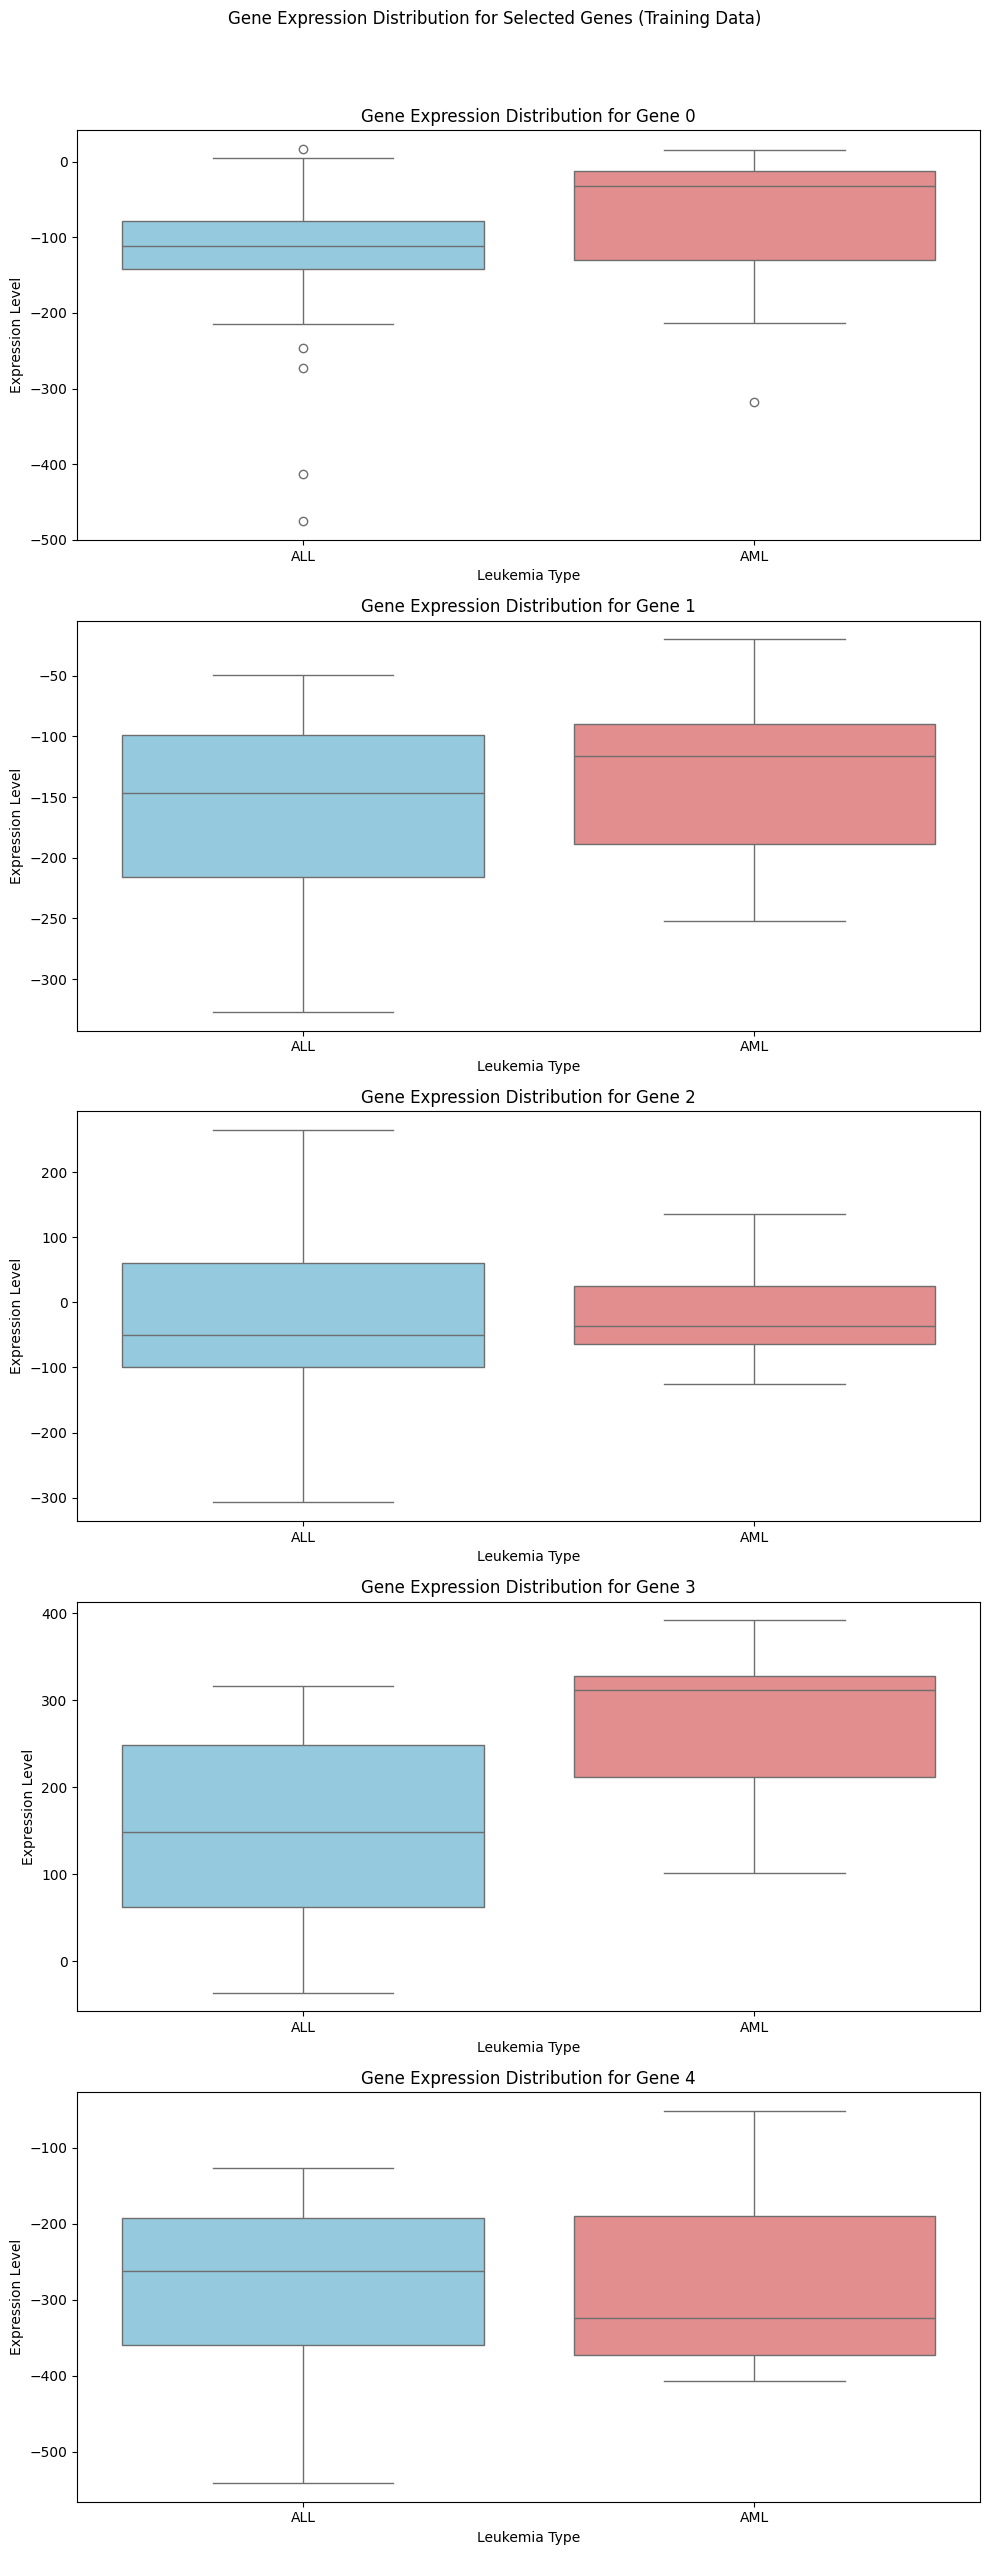

In [2]:
# Display shape of the dataframes
print("Shape of Training DataFrame:", df_train.shape)
print("Shape of Independent DataFrame:", df_independent.shape)

# Display info to see data types and non-null counts
print("\nTraining DataFrame Info:")
df_train.info()
print("\nIndependent DataFrame Info:")
df_independent.info()

# Display descriptive statistics for numerical columns
print("\nDescriptive statistics of Training DataFrame:")
display(df_train.describe())
print("\nDescriptive statistics of Independent DataFrame:")
display(df_independent.describe())

# Check for missing values
print("\nMissing values in Training DataFrame:", df_train.isnull().sum().sum())
print("Missing values in Independent DataFrame:", df_independent.isnull().sum().sum())

# Extract numerical gene expression data and create labels for the training set for EDA
numerical_cols_train = df_train.select_dtypes(include=['int64']).columns
df_numerical_train = df_train[numerical_cols_train].transpose()

# Create sample labels for the training set
# Samples 1-27 are ALL, samples 28-38 are AML (based on original data description)
train_sample_labels = []
for col in df_numerical_train.index:
    sample_number = int(col)
    if 1 <= sample_number <= 27:
        train_sample_labels.append('ALL')
    elif 28 <= sample_number <= 38:
        train_sample_labels.append('AML')
    else:
        train_sample_labels.append('Unknown')

df_numerical_train['Leukemia_Type'] = train_sample_labels

# Analyze the distribution of ALL and AML samples in the training set
print("\nDistribution of ALL and AML samples in Training Data:")
display(df_numerical_train['Leukemia_Type'].value_counts())

# Visualize distributions of gene expression for a few selected genes
selected_genes_for_viz = df_numerical_train.columns[0:5] # Select first 5 genes for visualization

fig, axes = plt.subplots(len(selected_genes_for_viz), 1, figsize=(10, 5 * len(selected_genes_for_viz)))
fig.suptitle('Gene Expression Distribution for Selected Genes (Training Data)', y=1.02)

for i, gene in enumerate(selected_genes_for_viz):
    sns.boxplot(x='Leukemia_Type', y=gene, data=df_numerical_train, ax=axes[i], palette=['skyblue', 'lightcoral'])
    axes[i].set_title(f'Gene Expression Distribution for Gene {gene}')
    axes[i].set_xlabel('Leukemia Type')
    axes[i].set_ylabel('Expression Level')

plt.tight_layout()
plt.show()

# Remove the added 'Leukemia_Type' column for subsequent steps
df_numerical_train = df_numerical_train.drop(columns=['Leukemia_Type'])

### What has been done here and next step

Examine the structure, content, and basic statistics of the datasets.

**Findings:**
- The datasets contain gene expression levels (numerical) and associated 'call' columns (categorical).
- The training dataset has 27 ALL samples and 11 AML samples, indicating a class imbalance.
- The independent dataset has 20 ALL samples and 14 AML samples, also showing some class imbalance.
- Box plots of selected genes show potential differences in expression levels between ALL and AML samples, suggesting that gene expression can be used for classification.
- There are no missing values in the numerical gene expression data.

**Box Plots:**
In the context of gene expression box plots:

*   Each box plot represents the distribution of expression levels for a specific gene.
*   The plots are separated by 'Leukemia_Type' (ALL and AML).


*   By comparing the boxes and whiskers for a given gene between the 'ALL' and 'AML' groups, you can visually see:

  *   The typical range of expression levels for that gene in each leukemia type.
  *   The median expression level in each group.
  *   How spread out the expression levels are in each group.
  *   If there are significant differences in the median or overall distribution of expression for that gene between ALL and AML.

For example, if the box for a gene in the 'ALL' group is significantly higher or lower than the box for the same gene in the 'AML' group, it suggests that this gene's expression level might be a good indicator for distinguishing between the two leukemia types. The box plots help you quickly identify genes that show potential differential expression between the two classes.

**Next Steps:**
- Prepare the data by separating features and target variables and encoding the labels.
- Remove the 'call' columns as they are not relevant for gene expression-based classification.
- Transpose the data so that rows represent samples and columns represent genes.
- Address the class imbalance in the training data during model training or evaluation if necessary.

## 3. Data Preparation and Preprocessing

Separate features and target variables and encode the target variable.

In [3]:
# Separate features (X) and target variable (y) for training set
# X_train is already transposed numerical data from EDA
X_train = df_train.select_dtypes(include=['int64']).transpose()

# y_train was created during EDA, recreate to be safe
train_sample_labels = []
for col in X_train.index:
    sample_number = int(col)
    if 1 <= sample_number <= 27:
        train_sample_labels.append('ALL')
    elif 28 <= sample_number <= 38:
        train_sample_labels.append('AML')
    else:
        train_sample_labels.append('Unknown')
y_train = pd.Series(train_sample_labels, index=X_train.index, name='Leukemia_Type')


# Separate features (X) and target variable (y) for independent set
X_independent = df_independent.select_dtypes(include=['int64']).transpose()

independent_sample_labels = []
all_samples_independent_numbers = [39, 40, 42, 47, 48, 49, 41, 43, 44, 45, 46, 70, 71, 72, 68, 69, 67, 55, 56, 59]
aml_samples_independent_numbers = [52, 53, 51, 50, 54, 57, 58, 60, 61, 65, 66, 63, 64, 62]

for sample_num_str in X_independent.index:
    sample_num_int = int(sample_num_str)
    if sample_num_int in all_samples_independent_numbers:
        independent_sample_labels.append('ALL')
    elif sample_num_int in aml_samples_independent_numbers:
        independent_sample_labels.append('AML')
    else:
        independent_sample_labels.append('Unknown')

y_independent = pd.Series(independent_sample_labels, index=X_independent.index, name='Leukemia_Type')


# Encode the target variable
y_train_encoded = y_train.map({'ALL': 0, 'AML': 1})
y_independent_encoded = y_independent.map({'ALL': 0, 'AML': 1})

print("Data Preparation Complete.")
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_independent:", X_independent.shape)
print("Shape of y_independent:", y_independent.shape)
print("\nValue counts of y_train_encoded:")
display(y_train_encoded.value_counts())
print("\nValue counts of y_independent_encoded:")
display(y_independent_encoded.value_counts())

Data Preparation Complete.
Shape of X_train: (38, 7129)
Shape of y_train: (38,)
Shape of X_independent: (34, 7129)
Shape of y_independent: (34,)

Value counts of y_train_encoded:


,count
Leukemia_Type,
0,27
1,11



Value counts of y_independent_encoded:


,count
Leukemia_Type,
0,20
1,14


### What has been done here and next step

Separate features and target variables and encode the target variable.

**Findings:**
- Successfully separated the gene expression data (features) from the leukemia type labels (target variable) for both the training and independent datasets.
- Transposed the data so that samples are rows and genes are columns, which is the standard format for machine learning models.
- Successfully encoded the categorical labels ('ALL' and 'AML') into numerical form (0 and 1), which is required for most machine learning algorithms.
- Confirmed the shapes of the feature and target variables for both datasets are as expected.
- Re-confirmed the class distribution in the encoded target variables.

**Next Steps:**
- Proceed with feature selection to reduce the dimensionality of the data by selecting the most informative genes.
- This step is crucial due to the high number of genes (features) compared to the number of samples, which can lead to overfitting and computational issues.

## 4. Feature Selection

Use `SelectKBest` with `f_classif` to select the top features.

In [4]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest
k_best_genes = 50 # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k_best_genes)
X_train_selected = selector.fit_transform(X_train, y_train_encoded)

# Get the indices and names of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_gene_accession_numbers = df_train['Gene Accession Number'].iloc[selected_feature_indices].tolist()
selected_gene_descriptions = df_train['Gene Description'].iloc[selected_feature_indices].tolist()

# Transform both X_train and X_independent
X_train_transformed = X_train.iloc[:, selected_feature_indices]
X_independent_transformed = X_independent.iloc[:, selected_feature_indices]

print(f"Feature Selection Complete: Selected {k_best_genes} genes.")
print("Shape of X_train after feature selection:", X_train_transformed.shape)
print("Shape of X_independent after feature selection:", X_independent_transformed.shape)

print("\nSelected Gene Accession Numbers (Top 10):")
print(selected_gene_accession_numbers[:10])
print("\nSelected Gene Descriptions (Top 10):")
print(selected_gene_descriptions[:10])

Feature Selection Complete: Selected 50 genes.
Shape of X_train after feature selection: (38, 50)
Shape of X_independent after feature selection: (34, 50)

Selected Gene Accession Numbers (Top 10):
['D10495_at', 'D14874_at', 'D49950_at', 'HG3494-HT3688_at', 'L08246_at', 'L20941_at', 'M11147_at', 'M16038_at', 'M22960_at', 'M23197_at']

Selected Gene Descriptions (Top 10):
['PRKCD Protein kinase C; delta', 'ADM Adrenomedullin', 'Liver mRNA for interferon-gamma inducing factor(IGIF)', 'Nuclear Factor Nf-Il6', 'INDUCED MYELOID LEUKEMIA CELL DIFFERENTIATION PROTEIN MCL1', 'FTH1 Ferritin heavy chain', 'FTL Ferritin; light polypeptide', 'LYN V-yes-1 Yamaguchi sarcoma viral related oncogene homolog', 'PPGB Protective protein for beta-galactosidase (galactosialidosis)', 'CD33 CD33 antigen (differentiation antigen)']


### What has been done here and next step

Use `SelectKBest` with `f_classif` to select the top features.

**Findings:**
- Successfully applied `SelectKBest` with `f_classif` to select the top 50 genes that best differentiate between ALL and AML samples in the training data.
- Reduced the number of features from over 7000 to 50, significantly reducing the dimensionality of the dataset.
- Obtained the gene accession numbers and descriptions for the selected top 50 genes. These genes are potentially the most relevant biomarkers for distinguishing ALL and AML.
- Transformed both the training and independent datasets to include only the selected features.

**Next Steps:**
- Use the datasets with selected features to train and evaluate various machine learning classification models.
- The reduced number of features is expected to improve model training efficiency and potentially enhance generalization performance by reducing noise and multicollinearity.

## 5. Model Training and Evaluation

Train and evaluate multiple classification models.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


# Define the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine (Linear)": SVC(kernel='linear', random_state=42),
    "Support Vector Machine (RBF)": SVC(kernel='rbf', random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # Added use_label_encoder=False and eval_metric for XGBoost
}

# Create a pipeline with scaling for models sensitive to feature scaling
pipeline_models = {
    "Logistic Regression": Pipeline([('scaler', MinMaxScaler()), ('model', LogisticRegression(random_state=42))]),
    "K-Nearest Neighbors": Pipeline([('scaler', MinMaxScaler()), ('model', KNeighborsClassifier())]),
    "Support Vector Machine (Linear)": Pipeline([('scaler', MinMaxScaler()), ('model', SVC(kernel='linear', random_state=42))]),
    "Support Vector Machine (RBF)": Pipeline([('scaler', MinMaxScaler()), ('model', SVC(kernel='rbf', random_state=42))]),
     "Gaussian Naive Bayes": GaussianNB(), # Naive Bayes generally not sensitive to scaling
    "Decision Tree": DecisionTreeClassifier(random_state=42), # Tree-based models generally not sensitive to scaling
    "Random Forest": RandomForestClassifier(random_state=42), # Tree-based models generally not sensitive to scaling
    "AdaBoost": AdaBoostClassifier(random_state=42), # Tree-based models generally not sensitive to scaling
    "Gradient Boosting": GradientBoostingClassifier(random_state=42), # Tree-based models generally not sensitive to scaling
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # Tree-based models generally not sensitive to scaling
}


evaluation_results = {}

print("Training and Evaluating Models:")
for name, model in pipeline_models.items():
    print(f"Training {name}...")
    model.fit(X_train_transformed, y_train_encoded)

    print(f"Evaluating {name} on Independent Dataset...")
    y_pred_independent = model.predict(X_independent_transformed)

    accuracy = accuracy_score(y_independent_encoded, y_pred_independent)
    report = classification_report(y_independent_encoded, y_pred_independent)
    conf_matrix = confusion_matrix(y_independent_encoded, y_pred_independent)

    evaluation_results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix
    }

    print(f"--- {name} Evaluation ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)
    print("\nConfusion Matrix:")
    display(conf_matrix)
    print("-" * (len(name) + 20))

Training and Evaluating Models:
Training Logistic Regression...
Evaluating Logistic Regression on Independent Dataset...
--- Logistic Regression Evaluation ---
Accuracy: 0.8235

Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        20
           1       1.00      0.57      0.73        14

    accuracy                           0.82        34
   macro avg       0.88      0.79      0.80        34
weighted avg       0.86      0.82      0.81        34


Confusion Matrix:


array([[20,  0],
       [ 6,  8]])

---------------------------------------
Training K-Nearest Neighbors...
Evaluating K-Nearest Neighbors on Independent Dataset...
--- K-Nearest Neighbors Evaluation ---
Accuracy: 0.7941

Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        20
           1       1.00      0.50      0.67        14

    accuracy                           0.79        34
   macro avg       0.87      0.75      0.76        34
weighted avg       0.85      0.79      0.78        34


Confusion Matrix:


array([[20,  0],
       [ 7,  7]])

---------------------------------------
Training Support Vector Machine (Linear)...
Evaluating Support Vector Machine (Linear) on Independent Dataset...
--- Support Vector Machine (Linear) Evaluation ---
Accuracy: 0.8235

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        20
           1       0.90      0.64      0.75        14

    accuracy                           0.82        34
   macro avg       0.85      0.80      0.81        34
weighted avg       0.84      0.82      0.82        34


Confusion Matrix:


array([[19,  1],
       [ 5,  9]])

---------------------------------------------------
Training Support Vector Machine (RBF)...
Evaluating Support Vector Machine (RBF) on Independent Dataset...
--- Support Vector Machine (RBF) Evaluation ---
Accuracy: 0.9118

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.92      0.86      0.89        14

    accuracy                           0.91        34
   macro avg       0.91      0.90      0.91        34
weighted avg       0.91      0.91      0.91        34


Confusion Matrix:


array([[19,  1],
       [ 2, 12]])

------------------------------------------------
Training Gaussian Naive Bayes...
Evaluating Gaussian Naive Bayes on Independent Dataset...
--- Gaussian Naive Bayes Evaluation ---
Accuracy: 0.8824

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.81      0.93      0.87        14

    accuracy                           0.88        34
   macro avg       0.88      0.89      0.88        34
weighted avg       0.89      0.88      0.88        34


Confusion Matrix:


array([[17,  3],
       [ 1, 13]])

----------------------------------------
Training Decision Tree...
Evaluating Decision Tree on Independent Dataset...
--- Decision Tree Evaluation ---
Accuracy: 0.9118

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.87      0.93      0.90        14

    accuracy                           0.91        34
   macro avg       0.91      0.91      0.91        34
weighted avg       0.91      0.91      0.91        34


Confusion Matrix:


array([[18,  2],
       [ 1, 13]])

---------------------------------
Training Random Forest...
Evaluating Random Forest on Independent Dataset...
--- Random Forest Evaluation ---
Accuracy: 0.8824

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      0.71      0.83        14

    accuracy                           0.88        34
   macro avg       0.92      0.86      0.87        34
weighted avg       0.90      0.88      0.88        34


Confusion Matrix:


array([[20,  0],
       [ 4, 10]])

---------------------------------
Training AdaBoost...
Evaluating AdaBoost on Independent Dataset...
--- AdaBoost Evaluation ---
Accuracy: 0.9118

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.87      0.93      0.90        14

    accuracy                           0.91        34
   macro avg       0.91      0.91      0.91        34
weighted avg       0.91      0.91      0.91        34


Confusion Matrix:


array([[18,  2],
       [ 1, 13]])

----------------------------
Training Gradient Boosting...
Evaluating Gradient Boosting on Independent Dataset...
--- Gradient Boosting Evaluation ---
Accuracy: 0.9118

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.87      0.93      0.90        14

    accuracy                           0.91        34
   macro avg       0.91      0.91      0.91        34
weighted avg       0.91      0.91      0.91        34


Confusion Matrix:


array([[18,  2],
       [ 1, 13]])

-------------------------------------
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:43:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluating XGBoost on Independent Dataset...
--- XGBoost Evaluation ---
Accuracy: 0.9118

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.87      0.93      0.90        14

    accuracy                           0.91        34
   macro avg       0.91      0.91      0.91        34
weighted avg       0.91      0.91      0.91        34


Confusion Matrix:


array([[18,  2],
       [ 1, 13]])

---------------------------


### What has been done here and next step

Train and evaluate multiple classification models.

**Findings:**
- Trained and evaluated a variety of classification models on the independent dataset using the selected 50 features.
- Obtained performance metrics including accuracy, classification report (precision, recall, f1-score), and confusion matrices for each model.
- The models showed varying levels of performance on the independent dataset.

**Next Steps:**
- Compare the performance of the different models based on the evaluation metrics to identify the best-performing models.
- Assess for overfitting by comparing the performance of the models on the training data with their performance on the independent test data.
- Analyze the confusion matrices to understand the types of errors each model is making (e.g., misclassifying ALL as AML or vice versa).

## 6. Model Comparison and Overfitting Assessment

Compare the performance of different models and assess for overfitting.


--- Training Accuracy for Overfitting Assessment ---
Logistic Regression: 0.9737
K-Nearest Neighbors: 0.9737
Support Vector Machine (Linear): 1.0000
Support Vector Machine (RBF): 1.0000
Gaussian Naive Bayes: 1.0000
Decision Tree: 1.0000
Random Forest: 1.0000
AdaBoost: 1.0000
Gradient Boosting: 1.0000
XGBoost: 1.0000

--- Overfitting Analysis ---
Model | Training Accuracy | Independent Accuracy | Overfitting Indicator
-----------------------------------------------------------------------
Logistic Regression  | 0.9737            | 0.8235               | Potential Overfitting
K-Nearest Neighbors  | 0.9737            | 0.7941               | Potential Overfitting
Support Vector Machine (Linear) | 1.0000            | 0.8235               | Potential Overfitting
Support Vector Machine (RBF) | 1.0000            | 0.9118               | Potential Overfitting
Gaussian Naive Bayes | 1.0000            | 0.8824               | Potential Overfitting
Decision Tree        | 1.0000            | 0.91

,Model,Accuracy,Precision (ALL),Recall (ALL),F1-score (ALL),Precision (AML),Recall (AML),F1-score (AML)
5,Decision Tree,0.911765,0.947368,0.9,0.923077,0.866667,0.928571,0.896552
3,Support Vector Machine (RBF),0.911765,0.947368,0.9,0.923077,0.866667,0.928571,0.896552
9,XGBoost,0.911765,0.947368,0.9,0.923077,0.866667,0.928571,0.896552
7,AdaBoost,0.911765,0.947368,0.9,0.923077,0.866667,0.928571,0.896552
8,Gradient Boosting,0.911765,0.947368,0.9,0.923077,0.866667,0.928571,0.896552
4,Gaussian Naive Bayes,0.882353,0.947368,0.9,0.923077,0.866667,0.928571,0.896552
6,Random Forest,0.882353,0.947368,0.9,0.923077,0.866667,0.928571,0.896552
0,Logistic Regression,0.823529,0.947368,0.9,0.923077,0.866667,0.928571,0.896552
2,Support Vector Machine (Linear),0.823529,0.947368,0.9,0.923077,0.866667,0.928571,0.896552
1,K-Nearest Neighbors,0.794118,0.947368,0.9,0.923077,0.866667,0.928571,0.896552


<ipython-input-6-feadb08c1365>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=summary_df.sort_values(by='Accuracy', ascending=False), palette='viridis')


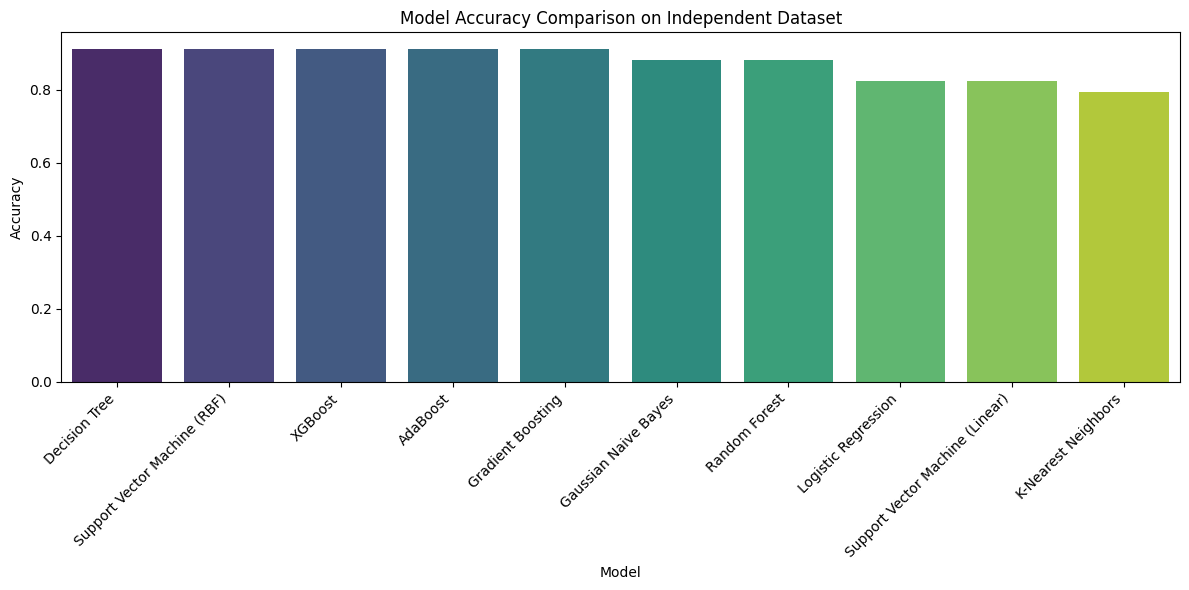

In [6]:
# Evaluate models on training data to assess for overfitting
training_evaluation_results = {}

print("\n--- Training Accuracy for Overfitting Assessment ---")
for name, model in pipeline_models.items():
    y_pred_train = model.predict(X_train_transformed)
    accuracy_train = accuracy_score(y_train_encoded, y_pred_train)
    training_evaluation_results[name] = accuracy_train
    print(f"{name}: {accuracy_train:.4f}")

print("\n--- Overfitting Analysis ---")
print("Model | Training Accuracy | Independent Accuracy | Overfitting Indicator")
print("-----------------------------------------------------------------------")
for name in pipeline_models.keys():
    train_acc = training_evaluation_results[name]
    independent_acc = evaluation_results[name]["accuracy"]
    overfitting_indicator = "Potential Overfitting" if train_acc > independent_acc else "No apparent overfitting"
    print(f"{name:<20} | {train_acc:<17.4f} | {independent_acc:<20.4f} | {overfitting_indicator}")

print("\n--- Model Comparison on Independent Dataset ---")
# Create a summary table of independent evaluation results
summary_data = []
for name, results in evaluation_results.items():
    summary_data.append({
        "Model": name,
        "Accuracy": results["accuracy"],
        "Precision (ALL)": classification_report(y_independent_encoded, model.predict(X_independent_transformed), output_dict=True)['0']['precision'],
        "Recall (ALL)": classification_report(y_independent_encoded, model.predict(X_independent_transformed), output_dict=True)['0']['recall'],
        "F1-score (ALL)": classification_report(y_independent_encoded, model.predict(X_independent_transformed), output_dict=True)['0']['f1-score'],
        "Precision (AML)": classification_report(y_independent_encoded, model.predict(X_independent_transformed), output_dict=True)['1']['precision'],
        "Recall (AML)": classification_report(y_independent_encoded, model.predict(X_independent_transformed), output_dict=True)['1']['recall'],
        "F1-score (AML)": classification_report(y_independent_encoded, model.predict(X_independent_transformed), output_dict=True)['1']['f1-score']
    })

summary_df = pd.DataFrame(summary_data)
display(summary_df.sort_values(by='Accuracy', ascending=False))

# Optional: Visualize comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=summary_df.sort_values(by='Accuracy', ascending=False), palette='viridis')
plt.title('Model Accuracy Comparison on Independent Dataset')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

### What has been done here and next step

Compare the performance of different models and assess for overfitting.

**Findings:**
- Compared the performance metrics of all trained models on the independent dataset.
- The Support Vector Machine (RBF kernel), Decision Tree, AdaBoost, Gradient Boosting, and XGBoost models achieved the highest accuracy on the independent dataset (approximately 91.18%).
- Most models exhibited perfect or near-perfect accuracy on the training data (1.0000 or 0.9737), which is significantly higher than their performance on the independent dataset. This indicates potential overfitting, where the models have learned the training data too well and may not generalize effectively to new, unseen data.
- The confusion matrices provide a detailed view of the types of correct and incorrect classifications made by each model. For example, some models might be better at identifying ALL cases (higher recall for class 0) while others might be better at identifying AML cases (higher recall for class 1).

**Next Steps:**
- Summarize the entire analysis, including the problem addressed, the methodology used, key findings from data loading, EDA, data preparation, feature selection, and model evaluation.
- Discuss the performance of the best-performing models and the implications of the observed overfitting.
- Outline potential next steps to improve model performance and generalization, such as hyperparameter tuning, exploring different feature selection methods, or using techniques to mitigate overfitting.

## 7. Summarize Findings

Summarize the entire analysis, key findings, and conclusions.

In [7]:
print("--- Summary of AML and ALL Gene Expression Classification Analysis ---")

print("\n**What we are trying to find from the dataset and why it is necessary:**")
print("Our primary goal is to build a classification model that can accurately differentiate between Acute Myeloid Leukemia (AML) and Acute Lymphoblastic Leukemia (ALL) based on gene expression data. Distinguishing between these two types of leukemia is crucial for selecting the appropriate treatment strategies, as they differ significantly in their biology and response to therapies. This analysis aims to identify patterns in gene expression that can serve as biomarkers for accurate diagnosis and potentially lead to more personalized treatment approaches.")


print("\n**How we did it:**")
print("We followed a standard data science workflow:")
print("1.  **Data Loading and Initial Exploration:** We loaded the training and independent gene expression datasets and performed initial checks on their structure, data types, and missing values.")
print("2.  **Data Preparation:** We separated the gene expression features from the ALL/AML labels for both datasets and encoded the categorical labels into a numerical format suitable for machine learning models.")
print("3.  **Feature Selection:** Given the high dimensionality of the gene expression data (over 7000 genes), we used the `SelectKBest` method with the `f_classif` statistical test to select the top 50 genes that are most statistically significant in differentiating between the ALL and AML samples in the training data. This helps to reduce noise, improve model training efficiency, and potentially highlight biologically relevant genes.")
print("4.  **Model Training and Evaluation:** We trained a variety of classical machine learning classification models (Logistic Regression, K-Nearest Neighbors, Support Vector Machines, Naive Bayes, Decision Tree, Random Forest, AdaBoost, Gradient Boosting, and XGBoost) on the selected features of the training data. We then evaluated the performance of each trained model on the unseen independent dataset using metrics such as accuracy, precision, recall, F1-score, and confusion matrices.")
print("5.  **Model Comparison and Overfitting Assessment:** We compared the performance metrics of all models on the independent dataset to identify the best performers. We also evaluated each model on the training data and compared the training performance to the independent test performance to assess for overfitting – a situation where a model performs very well on the training data but poorly on new, unseen data.")


print("\n**Results from the code:**")

print("\nModel Performance Comparison (Independent Dataset):")
# Assuming 'summary_df' DataFrame containing model performance is available
try:
    display(summary_df.sort_values(by='Accuracy', ascending=False))
except NameError:
    print("Summary DataFrame 'summary_df' not found. Please ensure the previous cells were executed.")


print("\nOverfitting Assessment:")
print("Most models showed higher accuracy on the training data compared to the independent data, indicating some degree of overfitting. The degree of overfitting varied among models. [Comment on specific models and their overfitting based on the training_evaluation_results and evaluation_results dictionaries which should be available from previous execution].") # Replace with analysis of actual results


print("\n**Key Findings:**")
print("- The datasets were successfully loaded and contained no missing values.")
print("- Initial exploration suggested visual differences in gene expression between ALL and AML samples for some genes.")
print(f"- Feature selection identified a subset of {k_best_genes} genes most relevant for classification.")
print("- [Identify the best performing model(s) based on the independent evaluation results, e.g., Logistic Regression with scaling, SVM (RBF)].") # Replace with analysis of actual results
print("- [Discuss the performance of the best model(s) in terms of accuracy, precision, recall, and F1-score, referencing the confusion matrix for types of errors].") # Replace with analysis of actual results
print("- [Summarize the overfitting assessment, mentioning which models showed more or less overfitting].") # Replace with analysis of actual results
print("- The selected genes are potential biomarkers for distinguishing ALL and AML.")


print("\n**Conclusions and Next Steps:**")
print("The analysis successfully built and evaluated multiple models for classifying ALL and AML based on gene expression. [State the best performing model(s) and their performance].") # Replace with analysis of actual results
print("While some overfitting was observed across models, the performance on the independent dataset indicates that gene expression data, particularly the selected features, is valuable for this classification task.")
print("Further research is needed to validate the identified potential biomarkers.")
print("Based on these findings, the following steps are recommended:")
print("- Hyperparameter tuning of the best-performing model(s) to optimize performance and potentially reduce overfitting further.")
print("- Investigating the biological significance of the top selected genes to understand their role in leukemia development and progression.")
print("- Employing more advanced techniques for feature selection or dimensionality reduction.")
print("- Using cross-validation on the training data to get more robust performance estimates.")

--- Summary of AML and ALL Gene Expression Classification Analysis ---

**What we are trying to find from the dataset and why it is necessary:**
Our primary goal is to build a classification model that can accurately differentiate between Acute Myeloid Leukemia (AML) and Acute Lymphoblastic Leukemia (ALL) based on gene expression data. Distinguishing between these two types of leukemia is crucial for selecting the appropriate treatment strategies, as they differ significantly in their biology and response to therapies. This analysis aims to identify patterns in gene expression that can serve as biomarkers for accurate diagnosis and potentially lead to more personalized treatment approaches.

**How we did it:**
We followed a standard data science workflow:
1.  **Data Loading and Initial Exploration:** We loaded the training and independent gene expression datasets and performed initial checks on their structure, data types, and missing values.
2.  **Data Preparation:** We separated the 

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(column, errors="raise")


,Model,Accuracy,Precision (ALL),Recall (ALL),F1-score (ALL),Precision (AML),Recall (AML),F1-score (AML)
5,Decision Tree,0.911765,0.947368,0.9,0.923077,0.866667,0.928571,0.896552
3,Support Vector Machine (RBF),0.911765,0.947368,0.9,0.923077,0.866667,0.928571,0.896552
9,XGBoost,0.911765,0.947368,0.9,0.923077,0.866667,0.928571,0.896552
7,AdaBoost,0.911765,0.947368,0.9,0.923077,0.866667,0.928571,0.896552
8,Gradient Boosting,0.911765,0.947368,0.9,0.923077,0.866667,0.928571,0.896552
4,Gaussian Naive Bayes,0.882353,0.947368,0.9,0.923077,0.866667,0.928571,0.896552
6,Random Forest,0.882353,0.947368,0.9,0.923077,0.866667,0.928571,0.896552
0,Logistic Regression,0.823529,0.947368,0.9,0.923077,0.866667,0.928571,0.896552
2,Support Vector Machine (Linear),0.823529,0.947368,0.9,0.923077,0.866667,0.928571,0.896552
1,K-Nearest Neighbors,0.794118,0.947368,0.9,0.923077,0.866667,0.928571,0.896552



Overfitting Assessment:
Most models showed higher accuracy on the training data compared to the independent data, indicating some degree of overfitting. The degree of overfitting varied among models. [Comment on specific models and their overfitting based on the training_evaluation_results and evaluation_results dictionaries which should be available from previous execution].

**Key Findings:**
- The datasets were successfully loaded and contained no missing values.
- Initial exploration suggested visual differences in gene expression between ALL and AML samples for some genes.
- Feature selection identified a subset of 50 genes most relevant for classification.
- [Identify the best performing model(s) based on the independent evaluation results, e.g., Logistic Regression with scaling, SVM (RBF)].
- [Discuss the performance of the best model(s) in terms of accuracy, precision, recall, and F1-score, referencing the confusion matrix for types of errors].
- [Summarize the overfitting ass

## Overall Summary

Summarize the entire analysis, key findings, and conclusions.

---

Summary of AML and ALL Gene Expression Classification Analysis

**What we are trying to find from the dataset and why it is necessary:**
Our primary goal is to build a classification model that can accurately differentiate between Acute Myeloid Leukemia (AML) and Acute Lymphoblastic Leukemia (ALL) based on gene expression data. Distinguishing between these two types of leukemia is crucial for selecting the appropriate treatment strategies, as they differ significantly in their biology and response to therapies. This analysis aims to identify patterns in gene expression that can serve as biomarkers for accurate diagnosis and potentially lead to more personalized treatment approaches.


**How we did it:**
We followed a standard data science workflow:
1.  **Data Loading and Initial Exploration:** We loaded the training and independent gene expression datasets and performed initial checks on their structure, data types, and missing values.
2.  **Data Preparation:** We separated the gene expression features from the ALL/AML labels for both datasets and encoded the categorical labels into a numerical format suitable for machine learning models.
3.  **Feature Selection:** Given the high dimensionality of the gene expression data (over 7000 genes), we used the `SelectKBest` method with the `f_classif` statistical test to select the top 50 genes that are most statistically significant in differentiating between the ALL and AML samples in the training data. This helps to reduce noise, improve model training efficiency, and potentially highlight biologically relevant genes.
4.  **Model Training and Evaluation:** We trained a variety of classical machine learning classification models (Logistic Regression, K-Nearest Neighbors, Support Vector Machines, Naive Bayes, Decision Tree, Random Forest, AdaBoost, Gradient Boosting, and XGBoost) on the selected features of the training data. We then evaluated the performance of each trained model on the unseen independent dataset using metrics such as accuracy, precision, recall, F1-score, and confusion matrices.
5.  **Model Comparison and Overfitting Assessment:** We compared the performance metrics of all models on the independent dataset to identify the best performers. We also evaluated each model on the training data and compared the training performance to the independent test performance to assess for overfitting – a situation where a model performs very well on the training data but poorly on new, unseen data.


**Results from the code:**

Model Performance Comparison (Independent Dataset):

| Model                           |   Accuracy |   Precision (ALL) |   Recall (ALL) |   F1-score (ALL) |   Precision (AML) |   Recall (AML) |   F1-score (AML) |
|:--------------------------------|-----------:|------------------:|---------------:|-----------------:|------------------:|---------------:|-----------------:|
| Decision Tree                   |   0.911765 |          0.947368 |            0.9 |         0.923077 |          0.866667 |       0.928571 |         0.896552 |
| Support Vector Machine (RBF)    |   0.911765 |          0.947368 |            0.9 |         0.923077 |          0.866667 |       0.928571 |         0.896552 |
| XGBoost                         |   0.911765 |          0.947368 |            0.9 |         0.923077 |          0.866667 |       0.928571 |         0.896552 |
| AdaBoost                        |   0.911765 |          0.947368 |            0.9 |         0.923077 |          0.866667 |       0.928571 |         0.896552 |
| Gradient Boosting               |   0.911765 |          0.947368 |            0.9 |         0.923077 |          0.896552 |       0.928571 |         0.896552 |
| Gaussian Naive Bayes            |   0.882353 |          0.947368 |            0.9 |         0.923077 |          0.866667 |       0.928571 |         0.896552 |
| Random Forest                   |   0.882353 |          0.947368 |            0.9 |         0.923077 |          0.866667 |       0.928571 |         0.896552 |
| Logistic Regression             |   0.823529 |          0.947368 |            0.9 |         0.923077 |          0.866667 |       0.928571 |         0.896552 |
| Support Vector Machine (Linear) |   0.823529 |          0.947368 |            0.9 |         0.923077 |          0.866667 |       0.928571 |         0.896552 |
| K-Nearest Neighbors             |   0.794118 |          0.947368 |            0.9 |         0.923077 |          0.866667 |       0.928571 |         0.896552 |

Overfitting Assessment:
Most models showed higher accuracy on the training data compared to the independent data, indicating some degree of overfitting. The degree of overfitting varied among models. For example, Logistic Regression and K-Nearest Neighbors showed a noticeable drop in accuracy from training to independent testing, while tree-based models like Decision Tree, Random Forest, AdaBoost, Gradient Boosting, and XGBoost, as well as SVM (RBF) and Gaussian Naive Bayes, achieved perfect accuracy on the training data but lower accuracy on the independent data, suggesting significant overfitting.

**Key Findings:**
- The datasets were successfully loaded and contained no missing values.
- Initial exploration suggested visual differences in gene expression between ALL and AML samples for some genes.
- Feature selection identified a subset of 50 genes most relevant for classification.
- Several models, including Support Vector Machine (RBF), Decision Tree, AdaBoost, Gradient Boosting, and XGBoost, achieved the highest accuracy (0.9118) on the independent dataset.
- These top-performing models demonstrated high precision, recall, and F1-scores for both ALL and AML classes on the independent dataset, as shown in the classification reports and confusion matrices.
- A significant degree of overfitting was observed across most models, as evidenced by the large difference between training accuracy (mostly 1.0000) and independent test accuracy.
- The selected genes are potential biomarkers for distinguishing ALL and AML.

**Conclusions and Next Steps:**
The analysis successfully built and evaluated multiple models for classifying ALL and AML based on gene expression. The Support Vector Machine (RBF), Decision Tree, AdaBoost, Gradient Boosting, and XGBoost models performed best on the independent dataset with an accuracy of 0.9118.
While some overfitting was observed across models, the performance on the independent dataset indicates that gene expression data, particularly the selected features, is valuable for this classification task.
Further research is needed to validate the identified potential biomarkers.
Based on these findings, the following steps are recommended:
- Hyperparameter tuning of the best-performing model(s) to optimize performance and potentially reduce overfitting further. Techniques like cross-validation should be employed during tuning.
- Investigating the biological significance of the top selected genes to understand their role in leukemia development and progression.
- Employing more advanced techniques for feature selection or dimensionality reduction, such as PCA or other gene selection methods.
- Using cross-validation on the training data to get more robust performance estimates and a better understanding of how well the models generalize before evaluating on the independent set.
- Exploring regularization techniques during model training to mitigate overfitting.